# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [116]:
#import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
twitter_data = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [118]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
image_prediction = pd.read_csv('image-predictions.tsv', sep = "\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
from tweepy import OAuthHandler

from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [119]:
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

JSONDecodeError: Extra data: line 1 column 3997 (char 3996)

In [120]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [121]:
#save the tweet_data to pandas DataFrame

tweet_data = pd.DataFrame(df_list, columns =['id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [122]:
# Display the twitter_data table

twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [123]:
# Display the image_prediction table
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [124]:
# Display the tweet_data table
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [125]:
# Display the sample twitter_data table
twitter_data.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
911,757597904299253760,NaN,NaN,2016-07-25 15:26:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @jon_hill987: @dog_rates There is a cunning...,7.575971e+17,280479778.0,2016-07-25 15:23:28 +0000,https://twitter.com/jon_hill987/status/7575971...,11,10,None,None,None,pupper,None
1305,707387676719185920,NaN,NaN,2016-03-09 02:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarkus. He's a Skinny Eastern Worcesters...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707387676...,10,10,Clarkus,None,None,None,None
1503,692017291282812928,NaN,NaN,2016-01-26 16:12:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kingsley Wellensworth III. He owns 7 r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692017291...,9,10,Kingsley,None,None,None,None
161,860563773140209665,NaN,NaN,2017-05-05 18:36:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lorenzo. He's an avid nifty hat wearer an...,NaN,NaN,NaN,https://www.gofundme.com/help-lorenzo-beat-can...,13,10,Lorenzo,None,None,None,None
1195,717421804990701568,NaN,NaN,2016-04-05 18:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717421804...,9,10,Ebby,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
1330,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Seriously, add us 🐶 11/10 for sad wet pupper h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705786532...,11,10,None,None,None,pupper,None
225,849051919805034497,NaN,NaN,2017-04-04 00:12:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. Kevin doesn't give a single h*c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849051919...,13,10,Kevin,None,None,None,None
1646,683834909291606017,NaN,NaN,2016-01-04 02:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a faulty pupper. Might need to rep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683834909...,9,10,None,None,None,pupper,None


In [126]:
# Display the sample image_prediction table
image_prediction.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1636,806242860592926720,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
1546,792394556390137856,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,cocker_spaniel,0.746387,True,Irish_setter,0.091615,True,miniature_poodle,0.061078,True
1512,786363235746385920,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg,1,golden_retriever,0.929266,True,Labrador_retriever,0.062867,True,Saluki,0.002157,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
1239,746872823977771008,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1,Pembroke,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True
1216,743545585370791937,https://pbs.twimg.com/media/ClGawiUWAAAgs0w.jpg,2,rapeseed,0.876875,False,standard_poodle,0.060584,True,Great_Pyrenees,0.033006,True
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,balloon,0.267961,False,lakeside,0.085764,False,rapeseed,0.040809,False
1237,746790600704425984,https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg,3,Boston_bull,0.936183,True,guinea_pig,0.010084,False,Cardigan,0.010077,True
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden_retriever,0.981652,True,cocker_spaniel,0.006790,True,Labrador_retriever,0.004325,True


In [127]:
# Display the sample tweet_data table

tweet_data.sample(30)

,id,retweet_count,favorite_count
93,874012996292530176,11007,35501
170,858860390427611136,8805,0
716,783695101801398276,3737,11650
1165,721503162398597120,2124,5086
1413,698703483621523456,425,1608
1660,682962037429899265,15043,26239
1334,705223444686888960,900,2829
2055,671355857343524864,119,508
739,780543529827336192,2032,7040
1154,724771698126512129,725,2593


In [128]:
#check information about rows, columns, data types and columns names of twitter_data table

twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [129]:
#check information about rows, columns, data types and columns names of tweet_data table

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2353 non-null   int64
 1   retweet_count   2353 non-null   int64
 2   favorite_count  2353 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [130]:
#check information about rows, columns, data types and columns names of image_prediction table

image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [131]:
#check rating denominator

twitter_data.rating_denominator.sort_values()

313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [132]:
#check rating numerator

twitter_data.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [133]:
#check value counts of rating denominator

twitter_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [134]:
#check value count of rating numerator

twitter_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [135]:
#check duplicate tweet id

sum(twitter_data.tweet_id.duplicated())

0

In [136]:
#check twitter_data statistical description

twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [137]:
#check image_prediction statistical description

image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [138]:
#check tweet_data statistical description

tweet_data.describe()

,id,retweet_count,favorite_count
count,2.353000e+03,2353.000000,2353.000000
mean,7.427304e+17,3165.916277,8083.325542
std,6.852444e+16,5285.614809,11816.729151
min,6.660293e+17,0.000000,0.000000
25%,6.783997e+17,626.000000,1415.000000
50%,7.195514e+17,1474.000000,3604.000000
75%,7.993088e+17,3652.000000,10132.000000
max,8.924206e+17,79515.000000,132810.000000


In [139]:
#check names value counts

twitter_data.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Grady        1
Fiji         1
Tito         1
Jim          1
Marq         1
Name: name, Length: 957, dtype: int64

### Quality issues
#### twitter_data table
1. tweet_id is not string

2. timestamp is not datetime

3. invalid dog names such as just, all, none, a, the, this, very, such, an, by, his, my, not

4. zero denominator in row 313

5. missing data in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### image_prediction
6. missing photos for some tweet IDs

7. some names start with capital letters while others with small letters

#### tweet_data
8. missing data in id, retweet_count, favorite_count

### Tidiness issues
1. id column instead on tweet_id in tweet_table

2. dog types separated in different columnns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [140]:
# Make copies of original pieces of data
twitter_data_clean = twitter_data.copy()
image_prediction_clean = image_prediction.copy()
tweet_data_clean = tweet_data.copy()

### Issue #1: tweet_id not string

#### Define: change tweet_id from integer to string

#### Code

In [141]:
twitter_data_clean.tweet_id = twitter_data_clean.tweet_id.astype(str) 

#### Test

In [142]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2: timestamp not datetime

#### Define: change timestamp to datetime

#### Code

In [143]:
twitter_data_clean['timestamp'] = pd.to_datetime(twitter_data_clean['timestamp'])

#### Test

In [144]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3: invalid dog names

#### Define: create a dictionary for the invalid names and replace with np.nan

#### Code

In [145]:
invalid_names = {'just', 'all', 'None', 'a', 'the', 'this', 'very', 'such', 'an', 'by', 'his', 'my', 'not'}

for names in invalid_names:
    twitter_data_clean['name'].replace(names, np.nan, inplace = True)

#### Test

In [146]:
twitter_data_clean.name.value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Lola       10
           ..
Brandy      1
General     1
Jo          1
Pluto       1
Timofy      1
Name: name, Length: 944, dtype: int64

### Issue #4: zero denominator in row 313

#### Define: drop the row

#### Code

In [147]:
twitter_data_clean = twitter_data_clean.drop(twitter_data_clean.index[313])

#### Test

In [148]:
twitter_data_clean.rating_denominator.sort_values()

2335      2
516       7
1564     10
1565     10
1566     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2355, dtype: int64

### Issue #5: missing data in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Define: check for rows without an entry in retweeted_status_id and in_reply_to_status_id using isnull function and drop the unneeded columns using drop function

#### Code

In [149]:

twitter_data_clean = twitter_data_clean[twitter_data_clean['retweeted_status_id'].isnull()]

twitter_data_clean = twitter_data_clean[twitter_data_clean['in_reply_to_status_id'].isnull()]

twitter_data_clean = twitter_data_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [150]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1410 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #6: missing photos for some twitter IDs in image_prediction table

#### Define: merge the image_prediction table to twitter_data table and drop rows with missing photos

#### Code

In [151]:
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str) 
twitter_data_clean = pd.merge(twitter_data_clean, image_prediction_clean, on = ['tweet_id'], how = 'left')

In [152]:
twitter_data_clean = twitter_data_clean[twitter_data_clean.jpg_url.notnull()]

#### Test

In [153]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1365 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  jpg_url             1971 non-null 

### Issue #7: some names start with capital letters while others with small letters

#### Define: change names that start with small letters to capital letters using str.title()

#### Code

In [154]:
twitter_data_clean.p1 = twitter_data_clean.p1.str.title()
twitter_data_clean.p2 = twitter_data_clean.p2.str.title()
twitter_data_clean.p3 = twitter_data_clean.p3.str.title()

#### Test

In [155]:
twitter_data_clean.p3.sort_values()

1477                Abaya
1774                Abaya
2051                Acorn
810         Affenpinscher
1507         Afghan_Hound
              ...        
1259    Yorkshire_Terrier
2016    Yorkshire_Terrier
1695    Yorkshire_Terrier
1449    Yorkshire_Terrier
1499                Zebra
Name: p3, Length: 1971, dtype: object

In [156]:
twitter_data_clean.p2.sort_values()

237         Academic_Gown
1821            Accordion
1315        Affenpinscher
2070         Afghan_Hound
750          Afghan_Hound
              ...        
1239    Yorkshire_Terrier
2085    Yorkshire_Terrier
608     Yorkshire_Terrier
1582    Yorkshire_Terrier
1535    Yorkshire_Terrier
Name: p2, Length: 1971, dtype: object

In [157]:
twitter_data_clean.p1.sort_values()

1659         Acorn_Squash
344          Acorn_Squash
217          Afghan_Hound
482          Afghan_Hound
587          Afghan_Hound
              ...        
1155    Yorkshire_Terrier
1372    Yorkshire_Terrier
986     Yorkshire_Terrier
1813    Yorkshire_Terrier
1801                Zebra
Name: p1, Length: 1971, dtype: object

### Issue #8: missing data in id, retweet_count, favorite_count

#### Define: rename id to tweet id, merge tweet_data_clean table to twitter_data_clean table 

#### Code

In [158]:
tweet_data_clean = tweet_data_clean.rename(columns = {'id' : 'tweet_id'})
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype(str) 
twitter_data_clean = pd.merge(twitter_data_clean, tweet_data_clean, on = ['tweet_id'], how = 'left')

#### Test

In [159]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1365 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  jpg_url             1971 non-null 

### Tidiness 

### Issue #9: id column instead on tweet_id in tweet_table

### Already cleaned 

### Issue #10: dog types separated in different columnns

#### Define: extract different dog types into a column and drop unrequired columns

In [160]:
twitter_data_clean['dog_type'] = twitter_data_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

twitter_data_clean = twitter_data_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [161]:
twitter_data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'dog_type'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [162]:
twitter_data_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Relationship between Dog types and retweet counts

In [168]:
#Distribution of dog types and retweet counts

#Let's define another function df_new (a series object) which grouped the dog types and retweet counts
df_new = twitter_data_clean.groupby('dog_type').retweet_count

#Let's summed up the series object
df_new.sum()



dog_type
doggo      425611.0
floofer     25587.0
pupper     512173.0
puppo      189760.0
Name: retweet_count, dtype: float64

### Insights:
1. pupper has the highest retweet counts

2. floofer has the lowest retweet counts

### Relationship between Dog types and favourite counts

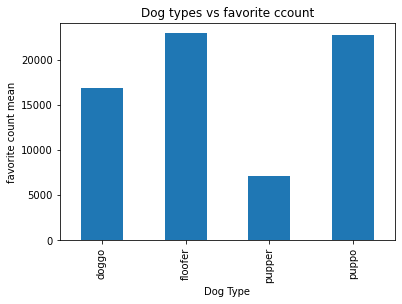

In [166]:
#Let's see the distribution of dog types and favorite counts using bar chart 

df = twitter_data_clean.groupby('dog_type').favorite_count

df.mean()

df.mean().plot(kind='bar')

plt.title('Dog types vs favorite ccount');
plt.xlabel('Dog Type')
plt.ylabel('favorite count mean');

### Insights:
1. floofer has the highest mean favorite counts

2. pupper has the lowest mean favorite counts

### Relationship between Dog types and rating 

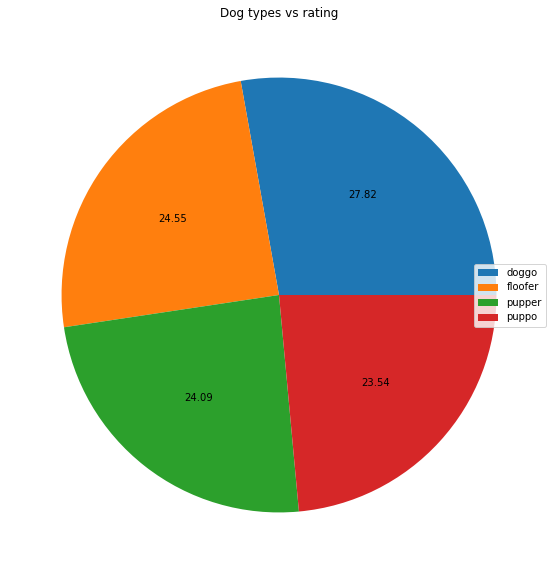

In [167]:
#Let's see the relationship between dog types and ratings using pie chart 

def autopct(pct):
    return ('%.2f' %pct) if pct > 10 else ''

my_labels = ('doggo', 'floofer', 'pupper', 'puppo')

df_1 = twitter_data_clean.groupby('dog_type').rating_numerator

ax = df_1.mean().plot(kind='pie', figsize=(20,10), autopct = autopct, labels = None)

ax.axes.get_yaxis().set_visible(False)

plt.legend(loc = 5, labels = my_labels)

plt.title('Dog types vs rating');



### Insights:
1. doggo has the highest average rating

2. puppo has the lowest average rating